<h1>SPAM CLASSIFIER MODEL<h1>

<h3>This model classifies whether an email is a spam mail or not.<br>
Spam: 1 means this is a spam mail<br>
Spam: 0 means this is a genuine mail</h3>
<p>This model is inspired from Dr. Ryan Ahmed, Ph.D., MBA from the Udemy Course Machine Learning Practical Workout | 8 Real-World Projects: Project 6 </p>

<h2 style = "color: blue">Importing Libraries</h2>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

<h2 style = "color: blue">Loading Data</h2>

In [2]:
messages = pd.read_csv("emails.csv")

In [25]:
messages

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


<h2 style = "color: blue">Cleaning the Data</h2>

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean


messages_df = messages['text'].apply(message_cleaning)

In [5]:
vectorizer = CountVectorizer(analyzer = message_cleaning)

In [6]:
messages_df = vectorizer.fit_transform(messages["text"])

In [7]:
messages_df = TfidfTransformer().fit_transform(messages_df)

In [8]:
messages_stat = messages["spam"]

<h2 style = "color: blue">Splitting data into train and test</h2>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(messages_df, messages_stat, test_size = 0.25)

In [12]:
NBclassifier = MultinomialNB()

<h2 style = "color: blue">Model Training</h2>

In [18]:
NBclassifier.fit(X_train, y_train)

MultinomialNB()

<h2 style = "color: blue">Model Evaluation<h2>

In [19]:
messages_predict = NBclassifier.predict(X_test)


In [20]:
cm = confusion_matrix(messages_predict, y_test)

<AxesSubplot:>

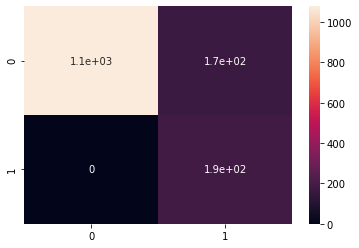

In [21]:
sns.heatmap(cm, annot = True)

In [24]:
print(classification_report(y_test, messages_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1077
           1       1.00      0.53      0.69       355

    accuracy                           0.88      1432
   macro avg       0.93      0.76      0.81      1432
weighted avg       0.90      0.88      0.87      1432

